In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
data=pd.read_csv("./hamspam.tsv",sep="\t")

In [3]:
data.head()

,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [4]:
data.columns=['label','news']

In [5]:
data.head()

,label,news
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 2 columns):
label    5567 non-null object
news     5567 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [7]:
data.loc[data['label']=='spam','label']=1

In [8]:
data.loc[data['label']=='ham','label']=0

In [9]:
import string 

In [10]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def messagecleaner(news):
    nonpunch=[]
    for char in news:
        if char not in string.punctuation:
            nonpunch.append(char)
    nonpunch="".join(nonpunch)
    return nonpunch
        
        

In [12]:
data['news']=data['news'].apply(messagecleaner)

In [13]:
data.head()

,label,news
0,1,Free entry in 2 a wkly comp to win FA Cup fina...
1,0,Nah I dont think he goes to usf he lives aroun...
2,0,Even my brother is not like to speak with me T...
3,0,I HAVE A DATE ON SUNDAY WITH WILL
4,0,As per your request Melle Melle Oru Minnaminun...


# SPLITING TRAINING AND TESTING DATASETS

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x=data['news'].values

In [16]:
y = data.iloc[:,0:1].values

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=53)

# COUNTERVECTOR (AS ALGO ARE GOOD WITH NUMBERS)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words="english") #delete all the common english words
ctrain=cv.fit_transform(xtrain).toarray()
ctest=cv.transform(xtest).toarray()

# FUNCTION FOR PLOTTING CONFUSION MATRIX

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# USING DIFFERENT CLASSIFICATION PROBLEM


# NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nb=MultinomialNB(alpha=0.1)
nb.fit(ctrain,ytrain.astype(int).ravel())

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [ ]:
y_pred=nb.predict(ctest)

In [ ]:
score = metrics.accuracy_score(ytest.astype(int),y_pred.astype(int))

In [ ]:
score

0.9829443447037702

Confusion matrix, without normalization
[[975   9]
 [ 10 120]]


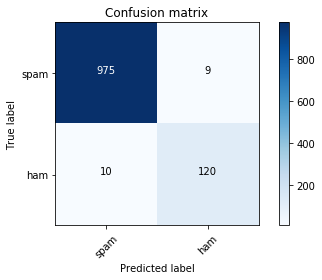

In [ ]:
import itertools
cm=metrics.confusion_matrix(ytest.astype(int),y_pred.astype(int))# cm=(ytest.astype(int),y_pred.astype(int))
plot_confusion_matrix(cm,classes=["spam","ham"])

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lor=LogisticRegression(solver='lbfgs')

In [ ]:
lor.fit(ctrain,ytrain.astype(int).ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
y_pred=lor.predict(ctest)

In [ ]:
score=metrics.accuracy_score(ytest.astype(int),y_pred.astype(int))

In [ ]:
score

0.9829443447037702

In [ ]:
cm=metrics.confusion_matrix(ytest.astype(int),y_pred.astype(int))

Confusion matrix, without normalization
[[984   0]
 [ 19 111]]


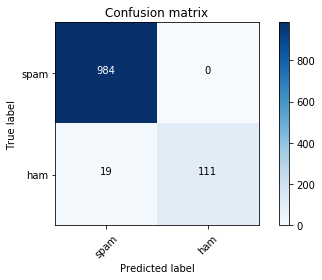

In [ ]:
plot_confusion_matrix(cm,classes=["spam","ham"])

# DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(ctrain,ytrain.astype(int))

In [ ]:
y_pred=dt.predict(ctest)

In [ ]:
score=metrics.accuracy_score(ytest.astype(int),y_pred.astype(int))

In [ ]:
score

In [ ]:
cm=metrics.confusion_matrix(ytest.astype(int),y_pred.astype(int))

In [ ]:
plot_confusion_matrix(cm,["spam","ham"])

# KN_NEIGHBOUR CLASSFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kn=KNeighborsClassifier()

In [ ]:
kn.fit(ctrain,ytrain.astype(int).ravel())

In [ ]:
y_pred=kn.predict(ctest)

In [ ]:
score=metrics.accuracy_score(ytest.astype(int),y_pred.astype(int))

In [ ]:
score

In [ ]:
cm=metrics.confusion_matrix(ytest.astype(int),y_pred.astype(int))

In [ ]:
plot_confusion_matrix(cm,["spam","ham"])

# PASSIVE AGGRESSIVE ALGORITHM

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
pa=PassiveAggressiveClassifier()

In [ ]:
pa.fit(ctrain.astype(int),ytrain.astype(int).ravel())

In [ ]:
y_pred=pa.predict(ctest)

In [ ]:
score=metrics.accuracy_score(ytest.astype(int),y_pred.astype(int))

In [ ]:
score

In [ ]:
cm=metrics.confusion_matrix(ytest.astype(int),y_pred.astype(int))

In [ ]:
plot_confusion_matrix(cm,["spam","ham"])

# SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
    lsvc=SVC(kernel='linear')

In [ ]:
lsvc.fit(ctrain.astype(int),ytrain.astype(int).ravel())

In [ ]:
y_pred=lsvc.predict(ctest)

In [ ]:
score=metrics.accuracy_score(ytest.astype(int),y_pred.astype(int))

In [ ]:
score

In [ ]:
cm=metrics.confusion_matrix(ytest.astype(int),y_pred.astype(int))

In [ ]:
plot_confusion_matrix(cm,["spam","ham"])

# SGD

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd=SGDClassifier()

In [ ]:
sgd.fit(ctrain.astype(int),ytrain.astype(int).ravel())

In [ ]:
y_pred=sgd.predict(ctest)

In [ ]:
score=metrics.accuracy_score(ytest.astype(int),y_pred.astype(int))

In [ ]:
score

In [ ]:
cm=metrics.confusion_matrix(ytest.astype(int),y_pred.astype(int))

In [ ]:
plot_confusion_matrix(cm,["spam","ham"])

# RANDOM FOREST 

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(ctrain,ytrain.astype(int).ravel())

In [ ]:
y_pred=rf.predict(ctest)

In [ ]:
score=metrics.accuracy_score(ytest.astype(int),y_pred.astype(int))

In [ ]:
score

In [ ]:
cm=metrics.confusion_matrix(ytest.astype(int),y_pred.astype(int))

In [ ]:
plot_confusion_matrix(cm,["spam","ham"])

# ADABOOST

In [ ]:
ada=AdaBoostClassifier()

In [ ]:
ada.fit(ctrain,ytrain.astype(int).ravel())

In [ ]:
y_pred=ada.predict(ctest)

In [ ]:
score=metrics.accuracy_score(ytest.astype(int),y_pred.astype(int))

In [ ]:
score

In [ ]:
cm=metrics.confusion_matrix(ytest.astype(int),y_pred.astype(int))

In [ ]:
plot_confusion_matrix(cm,["spam","ham"])

In [ ]:
message=input("enter the message ")
result=cv.transform([message])
res=sgd.predict(result)
print(res)
# res1=nb.predict(result)
# print(res1)
# res2=rf.predict(result)
# print(res2)